<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/DataVisualizationcheckpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

Objective
Data Visualization
Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following tasks:

Preprocessing phase:
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

2. Visualization phase:

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyze what it does exactly and its utilities. Write a paragraph describing your analysis (the paragraph should be in English).

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

As a final step, try to drop the useless columns (such as Names).

We dropped the column Names because we evaluated it to be useless. But that's ultimately not the case because we can create a very useful feature from Names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual. Hint: Extract the title from the column Names.

Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

As you have seen, there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones.

Hint: Use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

Let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [291]:
from google.colab import drive # import google colab 
drive.mount('/gdrive') # importer google drive 


import os 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [292]:
# chemin du fichier 
dataPath = '/gdrive/MyDrive/Gomycode /Introduction a IA /cours 4/checkpoint/titanic-passengers.csv'     

# Preprocessing phase 

Phase de prétraitement :
 Après avoir importé le jeu de données à l'aide de Pandas, commencez par montrer l'en-tête du jeu de données puis quelques informations générales sur les colonnes et les valeurs des données.

Dans un deuxième temps, appliquez ce que vous avez appris dans le cours pour prétraiter vos données : trouvez les informations manquantes et remplacez-les par les valeurs appropriées.

Vérifiez que vos données sont prêtes à être traitées.

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## L'en-tête du jeu de données

In [427]:
df = pd.read_csv(dataPath, encoding='ISO-8859-1', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


## Le Titanic et l'enjeu du problème

### Titanic
Le Titanic est un paquebot transatlantique britannique qui fait naufrage dans l'océan Atlantique Nord en 1912 à la suite d'une collision avec un iceberg, lors de son voyage inaugural de Southampton à New York 


Sur les près de 2 240 passagers qui se trouvaient à bord du Titanic, on estime à 712 le nombre de personnes ayant survécues au naufrage

source : [wikipedia](https://fr.wikipedia.org/wiki/Titanic)

### Enjeu

L'enjeu du problème ici est de déterminer grace à l'analyse de données quelles personnes avaient plus de chances de survi que d'autres ?

## Information generales 

 ### Information generales sur les colones

Le dataset contient 12 colones que sont : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [428]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Information generales sur les valeurs des données 

**PassengerId** : Numméro de passsagers qui sont à valeur unique et compte **891** passagers à bord dans notre dataset

In [430]:
df.PassengerId.is_unique

True

In [431]:
df.PassengerId.describe()


count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

**Survived** :  à valeurs catégoriques soit 2 possibilités

**No** pour survivant 

**Yes** pour non survivant  


In [432]:
df.Survived.describe()

count     891
unique      2
top        No
freq      549
Name: Survived, dtype: object

In [433]:
df.Survived.value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

**Pclass** : La classe des passagers à valeurs catégoriques

**1**  : 1ère classe ( classe Affaire )

**2** : 2em classe (classe moyenne)

**3** : 3em classe (classe economique)

In [434]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Name** :  Le registre de noms de chaque passagers au format :

**Prenom**, Titre. **Nom**(nom jeune fille)

In [435]:
df.Name.head()

0                     Collander, Mr. Erik Gustaf
1                        Moen, Mr. Sigurd Hansen
2                         Jensen, Mr. Hans Peder
3    Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                         Davidson, Mr. Thornton
Name: Name, dtype: object

**Sex** : Le sexe des passagers 

male : sexe masculin

female : sexe féminin

In [436]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

**Age** :  l'âge des passagers agés de 0 à 80 ans avec une moyenne d'age de 29 ans  

In [437]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**SibSp** :  le lien fraternelle c'est-à dire frère,sours.. de 0 à 5

In [438]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Parch** : Le lien de parenté  c'est-à dire père,mère,fils,fille... némoroté de 0 à 6

In [439]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**Ticket** : Le numéro de ticket, certains partages le même ticket sans doute un bébé ou un enfant enrégistré au numéro de ticket de son parent 

In [440]:
df.Ticket.value_counts()

CA. 2343      7
1601          7
347082        7
3101295       6
347088        6
             ..
C.A. 34260    1
28213         1
370377        1
347063        1
349215        1
Name: Ticket, Length: 681, dtype: int64

**Fare** : tarifs des passagers variable discrète en moyenne est de 32.20

In [441]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.0292      1
6.9500      1
7.8875      1
14.0000     1
38.5000     1
Name: Fare, Length: 248, dtype: int64

In [442]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Cabin** :  Numéro de cabines dont 147 sont utilisé dans le dataset 

In [443]:
df.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [444]:
df.Cabin.value_counts().count()


147

**Embarked** : les lieux d'embarquement

**S**: Southampton (Angleterre) soit 644 passagers

**C**: Cherbourg (France) soit 168 passagers

**Q**: Queenstown (Irland) soit 77 passagers *texte en italique*

In [445]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Pre-traitement

### Où se trouvent les missing values ?

In [313]:
nbrTotalNanValue = df.isnull().sum().sum()
print('les missing values du dataset sont au nbr de ',nbrTotalNanValue)

les missing values du dataset sont au nbr de  866


In [314]:
# Ou se trouve les valeurs null ? 

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [315]:
# la liste des colones ou se trouvent les valeur nan 
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

## data cleaning

⬛ On peut soit remplacer les missing value avec:
- mean
- median
- normal

⬛ soit supprimer des des colones / lignes 

les missing values peuvent être remplie soit 

▶ manuellement pour un petit dataset 

▶ automatiquement dans un grand dataset 

In [316]:
dfcleaning = df.copy()

In [317]:

dfcleaning.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### dropna() method

On  peut remarquer que la colone `Cabin` contient 687/891 lignes soit 78% du dataset on peut prendre ce maximun de valeurs pour supprimer une colone qui contient de valeur NaN \




In [318]:
dfcleaning = dfcleaning.dropna(axis=1, thresh=687)
dfcleaning.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

la colone `Embarked` contient que 2/891 lignes contenant des valeurs NaN
on peut dont remplacer par une méthode appris en cours  avec la methode ffill 

In [319]:
dfcleaning['Embarked'].fillna(method = 'ffill', inplace=True)
print('le nbre de valeur NaN de Embarked est egale à ',dfcleaning['Embarked'].isnull().sum())

le nbre de valeur NaN de Embarked est egale à  0


### fillna() methode
Remplacer les missing value dans la colone `Age` par la moyenne d'âge (177/891 lignes  soit 20% du dataset)

In [320]:
dfcleaning['Age'].fillna(dfcleaning['Age'].mean(), inplace=True)

dfcleaning['Age'] = dfcleaning['Age'].round(2) # arrondir la valeur à 2 chiffre significatis 
dfcleaning['Age']

0      28.0
1      25.0
2      20.0
3      29.0
4      31.0
       ... 
886    14.0
887    22.0
888    30.0
889    29.7
890    19.0
Name: Age, Length: 891, dtype: float64

## Data transformation

On doit faire l'encodage des valeurs Catégorique en valeur Numérique sur les colones de dtype = `object`\
Pour ce fare on peut utiliser le LabelEncoder de sklearn.preprocessing

In [321]:
# data frame qui contient une colone dtype = objet 
dfObject = pd.DataFrame()
dfObject['A'] = object
dfObject.A.dtypes

print('Les colones de types ',dfObject.A.dtypes,' sont :')
for colone in dfcleaning.columns.to_list():
    if( dfcleaning[colone].dtypes == dfObject.A.dtypes):
      print(colone)


Les colones de types  object  sont :
Survived
Name
Sex
Ticket
Embarked


### Initialisation d'un LabelEncoder()

In [322]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### Encodage 

In [323]:

dtypeObjectList = [colone for colone in dfcleaning.columns.to_list() if(dfcleaning[colone].dtypes == dfObject.A.dtypes)]
dtypeObjectList

['Survived', 'Name', 'Sex', 'Ticket', 'Embarked']

In [324]:
def Encodage(instance_colone):
  instance_colone = encoder.fit_transform(instance_colone)
  return instance_colone

# Aplication Code 
def code(data):
  for colone in [colone for colone in data.columns.to_list() if(data[colone].dtypes == dfObject.A.dtypes)]:
    data[colone] = Encodage(data[colone])
  return data

# dataset clean  
dataSauvegarde = dfcleaning.copy() 
dataframe = code(dfcleaning)

dataframe


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,170,1,28.0,0,0,159,13.0000,2
1,76,0,3,546,1,25.0,0,0,347,7.6500,2
2,641,0,3,397,1,20.0,0,0,409,7.8542,2
3,568,0,3,627,0,29.0,0,4,395,21.0750,2
4,672,0,1,202,1,31.0,1,0,569,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,576,0,14.0,1,0,132,30.0708,0
887,61,0,3,749,1,22.0,0,0,197,7.2292,0
888,535,0,3,123,0,30.0,0,0,260,8.6625,2
889,102,0,3,658,1,29.7,0,0,361,7.8958,2


In [325]:
dataframe = code(dfcleaning)

# 2. Phase de visualisation :

Commencez par étudier la distribution des caractéristiques les plus importantes en fonction de votre compréhension de l'ensemble de données et du problème.

Visualisez la corrélation entre le sexe et l'âge dans un graphique de votre choix. Le graphique visualisé devrait nous donner des déductions évidentes concernant l'importance de l'âge et du sexe dans la survie des individus.

Choisissez deux autres caractéristiques et étudiez leur impact sur la survie des individus.


Supprimer des colones pas très importantes pour notre model 

In [326]:
dataVisualisation = dataframe.copy() 
dataVisualisation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,170,1,28.0,0,0,159,13.0000,2
1,76,0,3,546,1,25.0,0,0,347,7.6500,2
2,641,0,3,397,1,20.0,0,0,409,7.8542,2
3,568,0,3,627,0,29.0,0,4,395,21.0750,2
4,672,0,1,202,1,31.0,1,0,569,52.0000,2
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,576,0,14.0,1,0,132,30.0708,0
887,61,0,3,749,1,22.0,0,0,197,7.2292,0
888,535,0,3,123,0,30.0,0,0,260,8.6625,2
889,102,0,3,658,1,29.7,0,0,361,7.8958,2


### Visualiser les variables les plus importantes :
Les colones suivantes sont ne necessites pas d'être visualisées :

❌ Ticket

❌ PassengerId

❌ Name

car elle comportent un grand nombre de valeurs uniques   

In [327]:
dataVisualisation = dataVisualisation.drop(columns=['Ticket', 'PassengerId', 'Name'])
dataVisualisation.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### Distribution des caractéristiques les plus importantes 

la distribution des passagers selon leur Sexes

In [328]:
dataVisualisation['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

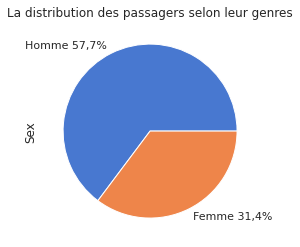

In [329]:

g = dataVisualisation['Sex'].value_counts().plot.pie(labels =["Homme 57,7%",'Femme 31,4%'], title="La distribution des passagers selon leur genres")

la distribution des passagers selon leur Age

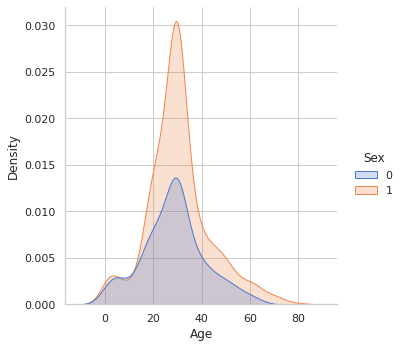

In [330]:
sns.displot(dataVisualisation, x="Age", hue="Sex", kind="kde", fill=True)


Combien de personnes ont survecu ?

In [331]:
dataVisualisation.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Les distributions des survivants selon La classe Passagers

In [368]:
SurvivedparPclass =(dataframe.groupby(['Survived','Pclass']).count()).PassengerId
SurvivedparPclass

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

Text(0.5, 0, '(Survivant?, Classe)')

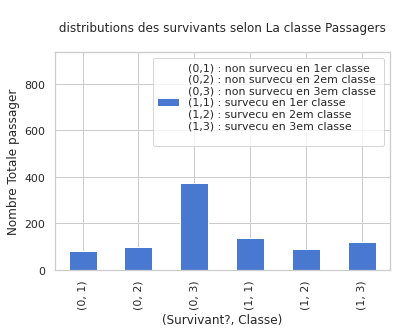

In [456]:
g = SurvivedparPclass.plot.bar()
g.legend(labels=["(0,1) : non survecu en 1er classe \n(0,2) : non survecu en 2em classe \n(0,3) : non survecu en 3em classe \n(1,1) : survecu en 1er classe \n(1,2) : survecu en 2em classe \n(1,3) : survecu en 3em classe \n"])
g.plot([891]) # colone
g.set_title('\n distributions des survivants selon La classe Passagers \n')
g.set_ylabel('Nombre Totale passager')
g.set_xlabel('(Survivant?, Classe)')

Proportion des tarif payés en moyenne d'age  




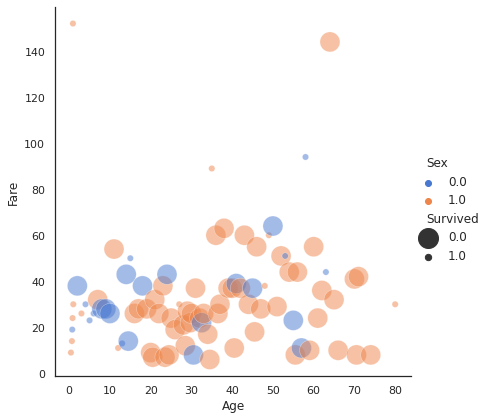

In [552]:
sns.set_theme(style="white")


sns.relplot(x="Age", 
            y="Fare",
            hue="Sex", 
            size="Survived",
            sizes=(40, 400), 
            alpha=.5, 
            palette="muted",
            height=6, 
            data=dataVisualisation.groupby(['Age']).mean().round(0))

### Corelation sex & age 

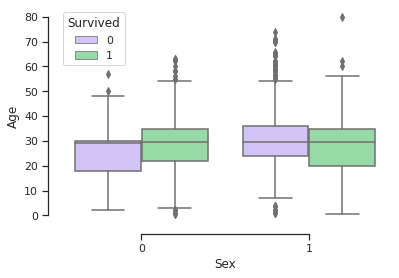

In [553]:
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="Sex", #variable catégorique
            y="Age", #variable Numerique
            hue="Survived", #variable catégorique 
            palette=["m", "g"],
            data=dataVisualisation)
sns.despine(offset=10, trim=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0.5, '')]

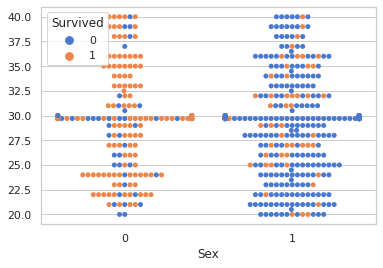

In [554]:
sns.set_theme(style="whitegrid", palette="muted")

ax = sns.swarmplot(data=dataVisualisation[dataVisualisation['Age']<=40][dataVisualisation['Age']>=20], x="Sex", y="Age", hue="Survived")
ax.set(ylabel="")

### Interpretation
🔜  Les femmes ont plus de chance de survit que les hommes surtout sur une moyenne d'age 20<= femme, homme <40

Choisissez deux autres fonctions et étudiez leur impact sur la survie des individus.

Examinez cette fonction :

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Essayez d'exécuter la fonction, analysez ce qu'elle fait exactement et ses utilités. Rédigez un paragraphe décrivant votre analyse (le paragraphe doit être rédigé en anglais).



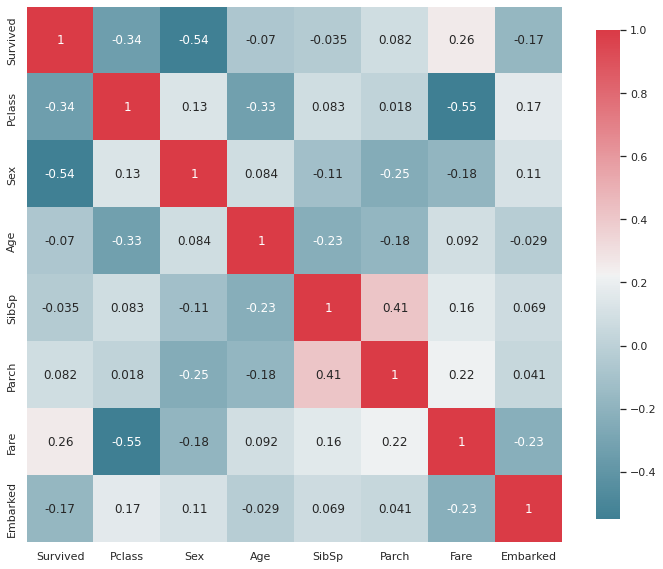

In [555]:

# implementer la fonction 
def plot_correlation_map( df ):
  corr = df.corr()
  s , ax = plt.subplots( figsize =( 12 , 10 ) )
  cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
  s = sns.heatmap(
    corr, 

    cmap = cmap,

    square=True, 

    cbar_kws={ 'shrink' : .9 }, 

    ax=ax, 

    annot = True, 

    annot_kws = { 'fontsize' : 12 }

    )
  
plot_correlation_map(dataVisualisation)

### Analyse de la fonction `plot_correlation_map`

La fonction `plot_correlation_map` de créer une matrice de correlation entre les différentes variables du dataframe. L'échèlle de correlation étant de -0.4 à 1.0 avec un code couleur allant du bleu au rouge.
les variables fortement corrolées sont donc celles qui ont des couleurs qui tendent vers le rouge et les moins corrolées sont celles qui tendent vers le bleu.

Exemple  : Fare et Survived sont fortements en correlation et le Sex et Survived sont pas en faible correlation



Utilisez la fonction groupby combinée avec la fonction mean() pour visualiser la relation entre Pclass et survived.

In [556]:
dPclass  = dataVisualisation.groupby(['Pclass', 'Survived']).mean().round(2)
dPclass

Sex    Age  SibSp  Parch   Fare  Embarked
Pclass Survived                                            
1      0         0.96  40.90   0.29   0.30  64.68      1.34
       1         0.33  34.78   0.49   0.39  95.61      1.11
2      0         0.94  33.27   0.32   0.14  19.41      1.82
       1         0.20  26.08   0.49   0.64  22.06      1.77
3      0         0.81  27.42   0.67   0.38  13.67      1.66
       1         0.39  23.23   0.44   0.42  13.69      1.35



Comme étape finale, essayez d'éliminer les colonnes inutiles (telles que Names).

Nous avons supprimé la colonne Names parce que nous l'avons jugée inutile. Mais ce n'est finalement pas le cas car nous pouvons créer une fonctionnalité très utile à partir de Names.



In [557]:
data = dataVisualisation.drop(columns=['SibSp', 'Parch', 'Embarked'])
data['Name'] = df['Name']
data

,Survived,Pclass,Sex,Age,Fare,Name
0,0,2,1,28.0,13.0000,"Collander, Mr. Erik Gustaf"
1,0,3,1,25.0,7.6500,"Moen, Mr. Sigurd Hansen"
2,0,3,1,20.0,7.8542,"Jensen, Mr. Hans Peder"
3,0,3,0,29.0,21.0750,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,0,1,1,31.0,52.0000,"Davidson, Mr. Thornton"
...,...,...,...,...,...,...
886,1,2,0,14.0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)"
887,0,3,1,22.0,7.2292,"Sirayanian, Mr. Orsen"
888,0,3,0,30.0,8.6625,"Cacic, Miss. Marija"
889,0,3,1,29.7,7.8958,"Petroff, Mr. Pastcho (""Pentcho"")"


Votre tâche consiste maintenant à créer une nouvelle colonne appelée Titre qui contient le Titre approprié pour chaque individu. Astuce : Extrayez le titre de la colonne Noms.



In [558]:

Titres= data.Name.str.split(", ").map(lambda x:x[1]).str.split(".").map(lambda x:x[0])
# ou 
# Titres = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
data['Title']= Titres
type(Titres)

pandas.core.series.Series

In [ ]:
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

Visualisez la corrélation entre le titre et d'autres caractéristiques (par exemple, le sexe, l'âge, la couleur).



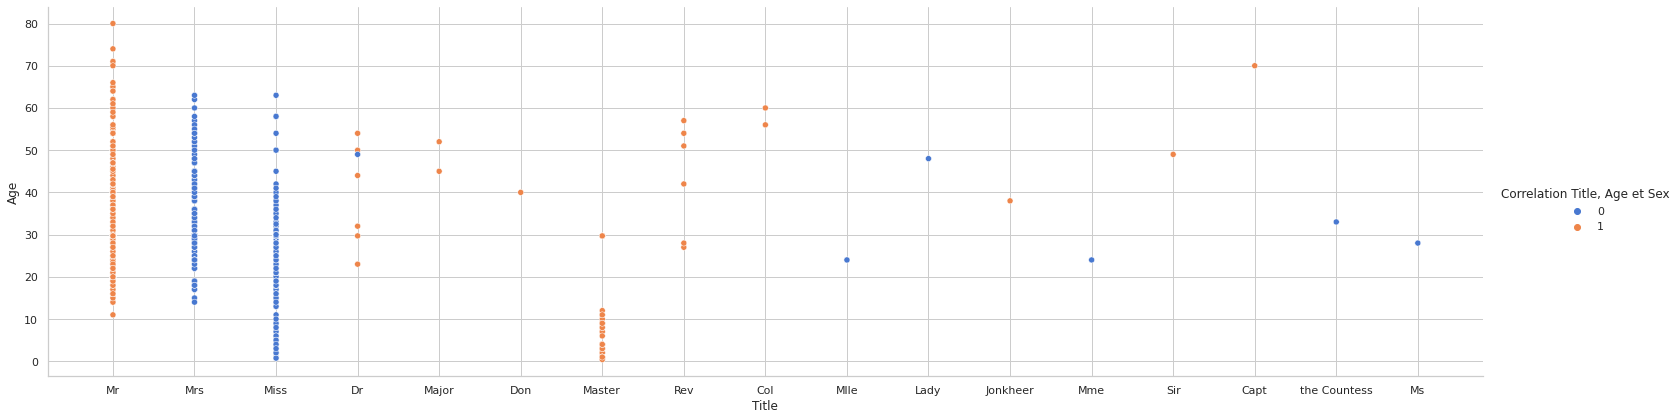

In [559]:
graphTitle = sns.FacetGrid(data, height=6, aspect=3.5 )
graphTitle.map_dataframe(sns.scatterplot, x="Title", y="Age", hue="Sex" )
graphTitle.add_legend( title='Correlation Title, Age et Sex')

## Interpretation

* Le Titre Mr correspond aux hommes agés entre 10 et 80 ans \
* Le Titre Mrs correspond aux femmes agés entre 12 et 65 ans \
* Le Titre Miss correspond aux femmes agés entre 0 et 65 ans \
* Le Titre Dr correspond majoritairement aux Hommes de entre 20 et 55 ans
à femmes agés 49 ans \

* Les Titres Major, Don, Rev, Col, Jonkheer, Sir, Capt correspondent aux Hommes de 0 à 70 ans \
* Les Titres Mlle, Mme, The Countess, Ms correspondent à des femmes agées de 25,
50 ans


In [560]:
data = data.drop(columns=['Name'])
data

,Survived,Pclass,Sex,Age,Fare,Title
0,0,2,1,28.0,13.0000,Mr
1,0,3,1,25.0,7.6500,Mr
2,0,3,1,20.0,7.8542,Mr
3,0,3,0,29.0,21.0750,Mrs
4,0,1,1,31.0,52.0000,Mr
...,...,...,...,...,...,...
886,1,2,0,14.0,30.0708,Mrs
887,0,3,1,22.0,7.2292,Mr
888,0,3,0,30.0,8.6625,Miss
889,0,3,1,29.7,7.8958,Mr


In [561]:
data.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

Comme vous l'avez vu, il y a beaucoup de titres, ce qui rend cette fonction très peu pratique. Essayons de regrouper ces titres en titres plus utiles.







In [562]:
Title_Dictionary = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Lady" :      "Royalty",
    "the Countess": "Royality",
    "Dona": "Royality",
    "Mme":        "Miss",
    "Mlle":       "Miss",
    "Miss" :      "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mrs",
    "Mrs" :       "Mrs",
    "Master" :    "Master"
    }



In [563]:

data.Title = data.Title.map(Title_Dictionary)
data.Title.value_counts()

Mrs         643
Miss        185
Master       40
Officer      18
Royalty       4
Royality      1
Name: Title, dtype: int64

Visualisons maintenant les mêmes corrélations en utilisant ces nouveaux titres.



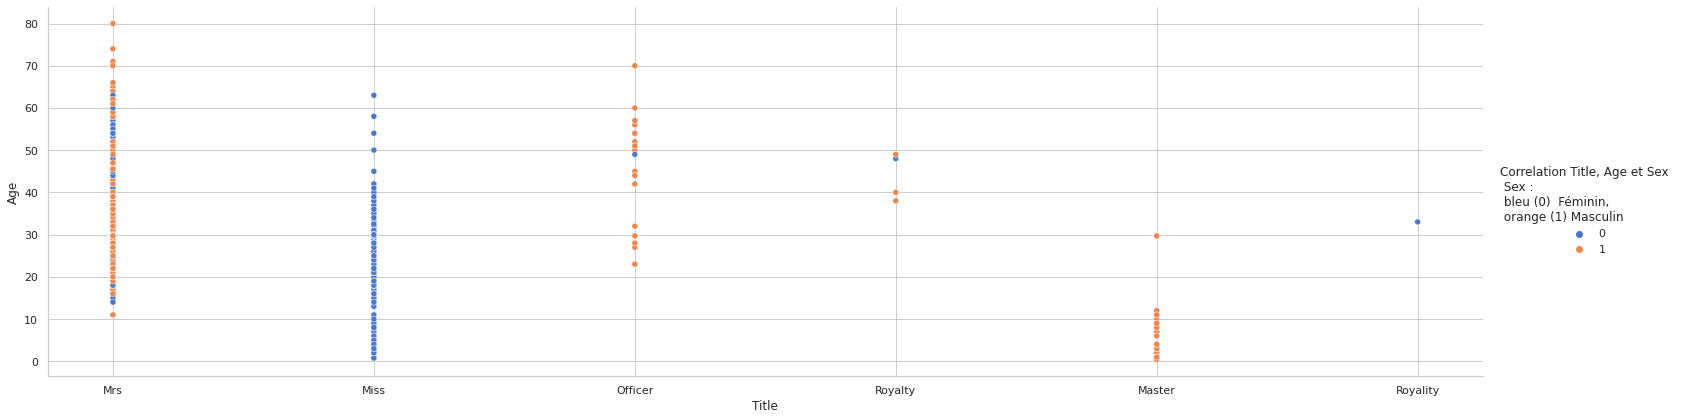

In [564]:
graphTitle2 = sns.FacetGrid(data, height=6, aspect=3.5 )
graphTitle2.map_dataframe(sns.scatterplot, x="Title", y="Age", hue="Sex" )
graphTitle2.add_legend( title='Correlation Title, Age et Sex \n Sex : \n bleu (0)  Féminin, \n orange (1) Masculin')

Enfin, utilisez les colonnes Parch et SibSp pour créer une caractéristique plus utile, appelons-la FamilySize.



In [565]:
data['FamilySize'] = df.SibSp + df.Parch
data['FamilySize'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: FamilySize, dtype: float64

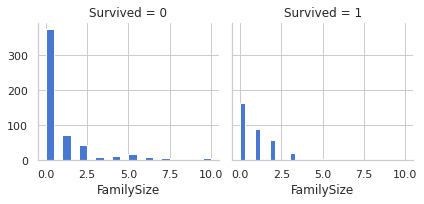

In [570]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'FamilySize', bins=20)

Utilisez ce que vous avez appris jusqu'à présent pour conclure si cette caractéristique est utile ou non..

## Conclusion
Les personnes qui ont plus de chance de survit sont les femmes Titre Miss de à à 40 situé en 1ère classe 

Et les hommes entres 20 et 40 ans titre Mrs et Officier située en 1ere classe ausssi 